In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("hotel_bookings.csv")
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [3]:
print("Размер датасета:", df.shape)
print("Пропуски в данных:\n", df.isnull().sum())
print("Дубликаты:", df.duplicated().sum())

Размер датасета: (119390, 32)
Пропуски в данных:
 hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent  

In [5]:
# Удаляем дубликаты
df = df.drop_duplicates()


df = df.dropna(subset=['adr'])


num_cols = ['lead_time', 'adults', 'children', 'babies', 'adr', 
            'previous_cancellations', 'previous_bookings_not_canceled']


for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

print(df.isnull().sum())
print(df.shape)

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


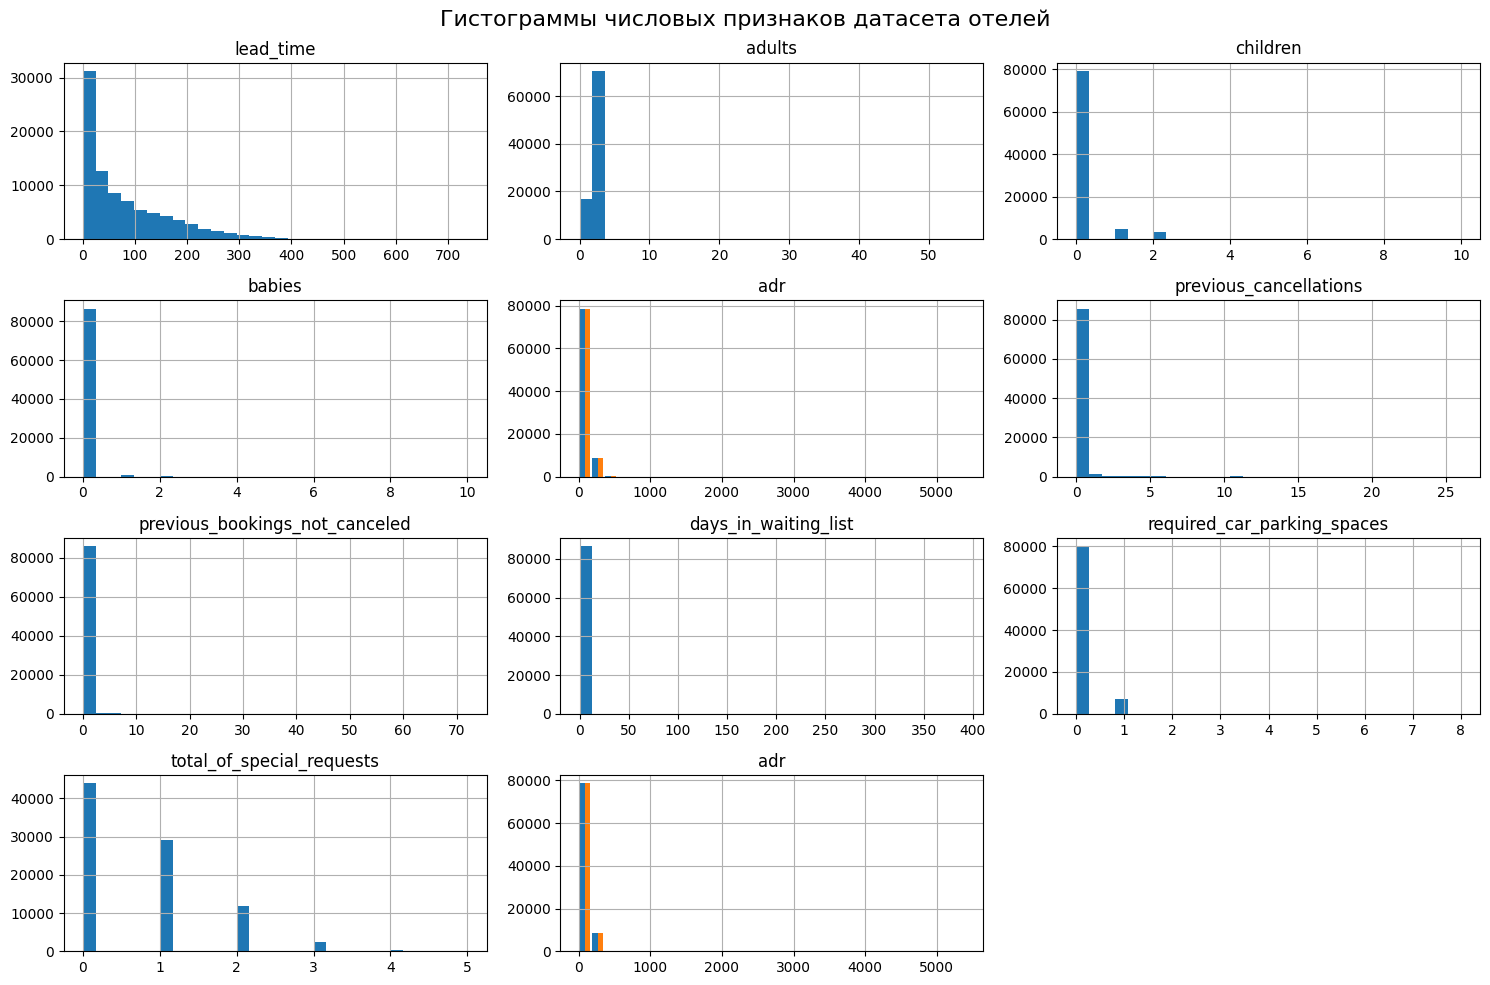

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем гистограммы

num_cols = ['lead_time', 'adults', 'children', 'babies', 'adr', 
            'previous_cancellations', 'previous_bookings_not_canceled',
            'days_in_waiting_list', 'required_car_parking_spaces',
            'total_of_special_requests']

# Добавляем целевую переменную
target_column = 'adr'


df[num_cols + [target_column]].hist(bins=30, figsize=(15, 10))
plt.suptitle("Гистограммы числовых признаков датасета отелей", fontsize=16)
plt.tight_layout()
plt.show()

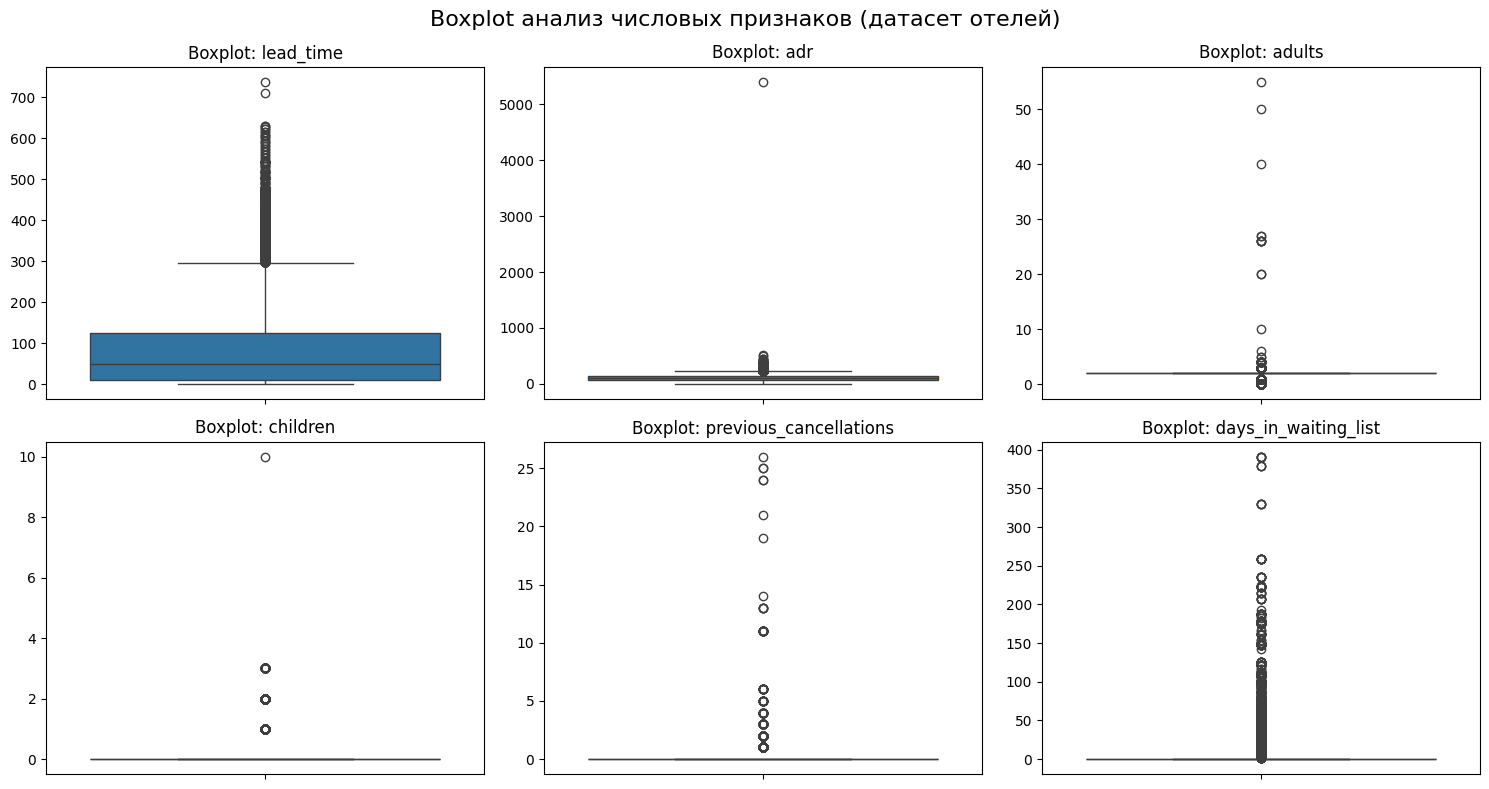

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


num_cols = ['lead_time', 'adr', 'adults', 'children', 
            'previous_cancellations', 'days_in_waiting_list']


plt.figure(figsize=(15, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
    plt.ylabel('')

plt.suptitle("Boxplot анализ числовых признаков (датасет отелей)", fontsize=16)
plt.tight_layout()
plt.show()

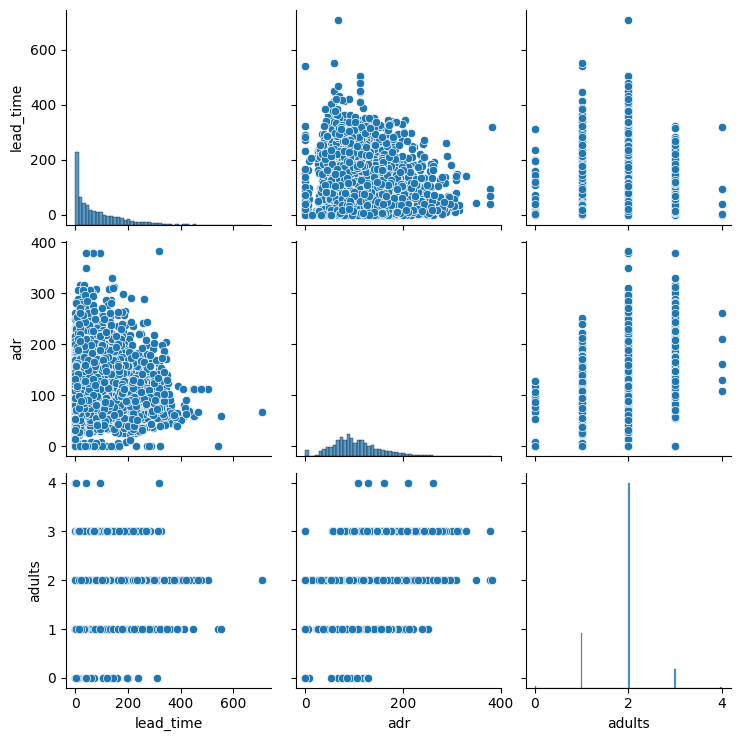

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sample = df.sample(5000, random_state=42)
sns.pairplot(sample[['lead_time', 'adr', 'adults']])
plt.show()

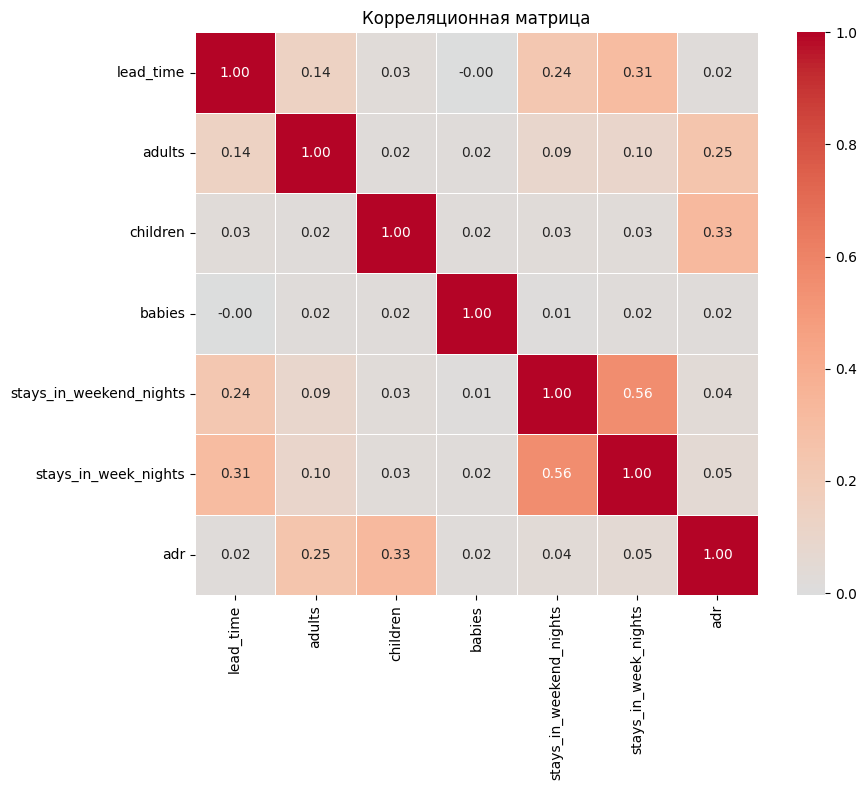

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


num_cols = ['lead_time',  'adults', 'children', 'babies',
            'stays_in_weekend_nights', 'stays_in_week_nights']


plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols + ['adr']].corr(), annot=True, cmap='coolwarm', 
            fmt='.2f', center=0, square=True, linewidths=0.5)
plt.title("Корреляционная матрица")
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split


num_cols = ['lead_time', 'adults', 'children', 
            'previous_cancellations', 'days_in_waiting_list']


X = df[num_cols]                     
y = df['adr']                


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print(f"X_train shape: {X_train.shape}") 
print(f"X_test shape: {X_test.shape}")   
print(f"y_train shape: {y_train.shape}")  
print(f"y_test shape: {y_test.shape}")    

X_train shape: (69916, 5)
X_test shape: (17480, 5)
y_train shape: (69916,)
y_test shape: (17480,)


In [13]:
from sklearn.model_selection import train_test_split


num_cols = [
    'lead_time',           # время бронирования
    'adults',              # количество взрослых
    'children',            # количество детей  
    'babies',              # количество младенцев
    'stays_in_weekend_nights',  # ночи на выходных
    'stays_in_week_nights',     # ночи в будни
    'previous_cancellations',   # история отмен
    'days_in_waiting_list',     # дни ожидания
    'required_car_parking_spaces',  # парковка
    'total_of_special_requests'  # специальные запросы
]


X = df[num_cols]
y = df['adr']

print("Признаки для предсказания цены (adr):")
for i, col in enumerate(num_cols, 1):
    print(f"{i:2}. {col}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nРазмеры после разделения:")
print(f"Обучающая выборка: {X_train.shape[0]} записей, {X_train.shape[1]} признаков")
print(f"Тестовая выборка:  {X_test.shape[0]} записей, {X_test.shape[1]} признаков")

Признаки для предсказания цены (adr):
 1. lead_time
 2. adults
 3. children
 4. babies
 5. stays_in_weekend_nights
 6. stays_in_week_nights
 7. previous_cancellations
 8. days_in_waiting_list
 9. required_car_parking_spaces
10. total_of_special_requests

Размеры после разделения:
Обучающая выборка: 69916 записей, 10 признаков
Тестовая выборка:  17480 записей, 10 признаков


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

print("X_train_normalized shape:", X_train_normalized.shape, f"(признаков: {X_train_normalized.shape[1]})")
print("X_test_normalized shape:", X_test_normalized.shape, f"(признаков: {X_test_normalized.shape[1]})")


print(f"\nКоличество признаков: {X_train_normalized.shape[1]}")
print(f"Количество наблюдений в train: {X_train_normalized.shape[0]}")
print(f"Количество наблюдений в test: {X_test_normalized.shape[0]}")

X_train_normalized shape: (69916, 10) (признаков: 10)
X_test_normalized shape: (17480, 10) (признаков: 10)

Количество признаков: 10
Количество наблюдений в train: 69916
Количество наблюдений в test: 17480


In [15]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_train_normalized, y_train)
lin_pred = lin_reg.predict(X_test_normalized)

print("Обучение LinearRegression завершено!")
print(f"Сделано {len(lin_pred)} предсказаний")
print(f"Пример предсказаний: {lin_pred[:5]}")

Обучение LinearRegression завершено!
Сделано 17480 предсказаний
Пример предсказаний: [100.21627015 108.36582438  91.17976461 118.51036588 100.68627927]


In [17]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV


lasso = Lasso()


params = {'alpha': np.logspace(-3, 1, 20)}  # 20 значений от 10^-3 до 10^1


lasso_grid = GridSearchCV(lasso, params, cv=5)  # cv=5 означает 5-кратную кросс-валидацию

print("="*60)
print("LASSO РЕГРЕССИЯ ДЛЯ ПРЕДСКАЗАНИЯ adr (ЦЕНЫ)")
print("="*60)
print("Начинаем подбор параметра alpha...")

# Обучаем модель 
lasso_grid.fit(X_train_normalized, y_train)


lasso_pred = lasso_grid.predict(X_test_normalized)


print("\n" + "="*60)
print("РЕЗУЛЬТАТЫ ПОДБОРА ПАРАМЕТРОВ LASSO")
print("="*60)
print("Лучшее alpha для LASSO:", lasso_grid.best_params_)



print(f"\nПример предсказаний LASSO (первые 5):")
for i, pred in enumerate(lasso_pred[:5], 1):
    print(f"  Предсказание {i}: {pred:.2f} €")

print(f"\nФактические цены (первые 5):")
for i, true in enumerate(y_test.values[:5], 1):
    print(f"  Фактическая {i}: {true:.2f} €")

LASSO РЕГРЕССИЯ ДЛЯ ПРЕДСКАЗАНИЯ adr (ЦЕНЫ)
Начинаем подбор параметра alpha...

РЕЗУЛЬТАТЫ ПОДБОРА ПАРАМЕТРОВ LASSO
Лучшее alpha для LASSO: {'alpha': np.float64(0.12742749857031335)}

Пример предсказаний LASSO (первые 5):
  Предсказание 1: 100.13 €
  Предсказание 2: 108.07 €
  Предсказание 3: 91.45 €
  Предсказание 4: 118.43 €
  Предсказание 5: 100.64 €

Фактические цены (первые 5):
  Фактическая 1: 124.00 €
  Фактическая 2: 171.47 €
  Фактическая 3: 43.00 €
  Фактическая 4: 200.05 €
  Фактическая 5: 247.67 €


In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np


ridge = Ridge()


params = {'alpha': np.logspace(-3, 2, 20)}  # 20 значений от 10^-3 до 10^2


ridge_grid = GridSearchCV(ridge, params, cv=5)  # cv=5 означает 5-кратную кросс-валидацию

print("="*60)
print("RIDGE РЕГРЕССИЯ ДЛЯ ПРЕДСКАЗАНИЯ adr (ЦЕНЫ)")
print("="*60)
print("Начинаем подбор параметра alpha...")

# Обучаем модель 
ridge_grid.fit(X_train_normalized, y_train)


ridge_pred = ridge_grid.predict(X_test_normalized)


print("\n" + "="*60)
print("РЕЗУЛЬТАТЫ ПОДБОРА ПАРАМЕТРОВ RIDGE")
print("="*60)
print("Лучшее alpha для Ridge:", ridge_grid.best_params_)



print(f"\nПример предсказаний Ridge (первые 5):")
for i, pred in enumerate(ridge_pred[:5], 1):
    print(f"  Предсказание {i}: {pred:.2f} €")

print(f"\nФактические цены (первые 5):")
for i, true in enumerate(y_test.values[:5], 1):
    print(f"  Фактическая {i}: {true:.2f} €")

RIDGE РЕГРЕССИЯ ДЛЯ ПРЕДСКАЗАНИЯ adr (ЦЕНЫ)
Начинаем подбор параметра alpha...

РЕЗУЛЬТАТЫ ПОДБОРА ПАРАМЕТРОВ RIDGE
Лучшее alpha для Ridge: {'alpha': np.float64(100.0)}

Пример предсказаний Ridge (первые 5):
  Предсказание 1: 100.22 €
  Предсказание 2: 108.37 €
  Предсказание 3: 91.20 €
  Предсказание 4: 118.50 €
  Предсказание 5: 100.69 €

Фактические цены (первые 5):
  Фактическая 1: 124.00 €
  Фактическая 2: 171.47 €
  Фактическая 3: 43.00 €
  Фактическая 4: 200.05 €
  Фактическая 5: 247.67 €


In [19]:
def print_metrics(name, y_test, pred):
    print(f"\n{name}:")
    print(f"MAE:  {mean_absolute_error(y_test, pred):.10f}")
    print(f"MSE:  {mean_squared_error(y_test, pred):.10f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred)):.10f}")
    print(f"R²:   {r2_score(y_test, pred):.11f}")

In [20]:

print("="*50)
print("ОЦЕНКА КАЧЕСТВА МОДЕЛЕЙ РЕГРЕССИИ")
print("="*50)

print_metrics("Linear Regression", y_test, lin_pred)
print_metrics("LASSO Regression", y_test, lasso_pred)
print_metrics("Ridge Regression", y_test, ridge_pred)

ОЦЕНКА КАЧЕСТВА МОДЕЛЕЙ РЕГРЕССИИ

Linear Regression:
MAE:  35.2868414332
MSE:  2158.3603040164
RMSE: 46.4581564853
R²:   0.21754841172

LASSO Regression:
MAE:  35.2994601438
MSE:  2159.7539386522
RMSE: 46.4731528805
R²:   0.21704318948

Ridge Regression:
MAE:  35.2889952231
MSE:  2158.5106132075
RMSE: 46.4597741407
R²:   0.21749392144


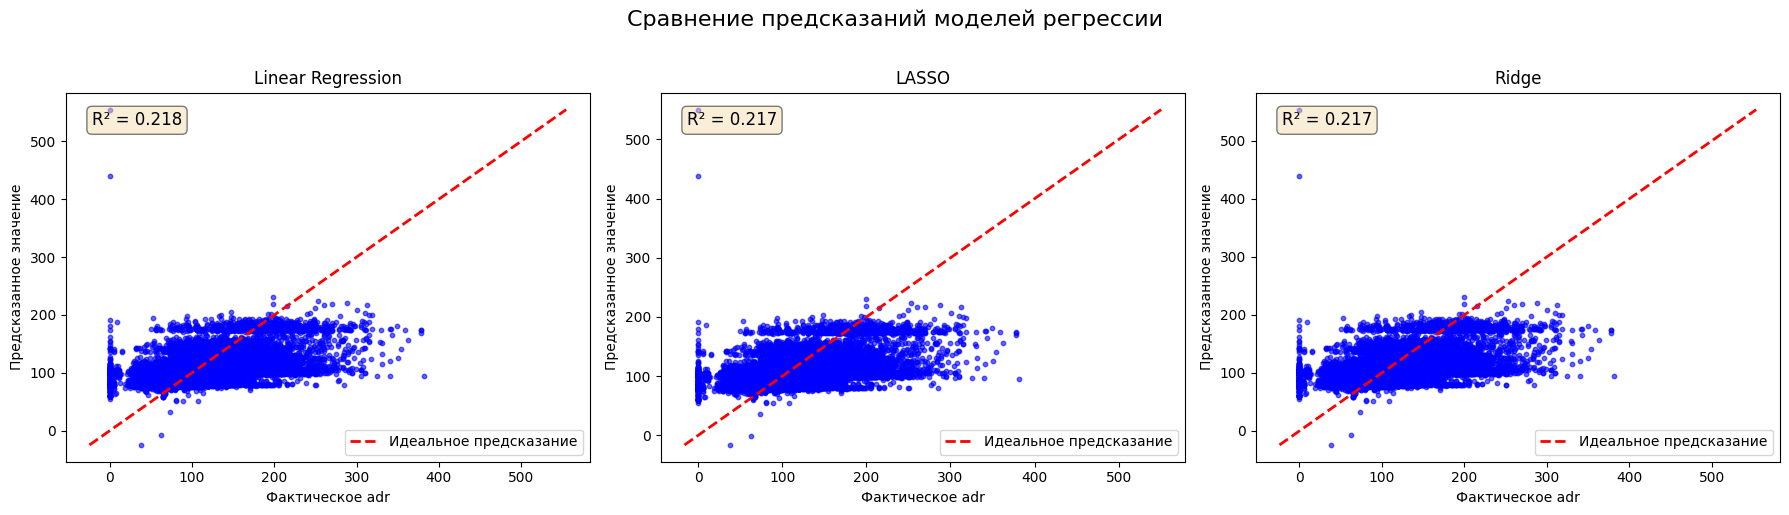

In [21]:
import matplotlib.pyplot as plt
import numpy as np


models = {
    "Linear Regression": lin_pred,
    "LASSO": lasso_pred,
    "Ridge": ridge_pred
}


plt.figure(figsize=(18, 5))

for i, (name, pred) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    
    # scatter plot: фактические значения vs предсказанные
    plt.scatter(y_test, pred, s=10, c='blue', alpha=0.6)
    
    # Линия идеального предсказания (y = x)
    y_min = min(y_test.min(), pred.min())
    y_max = max(y_test.max(), pred.max())
    plt.plot([y_min, y_max], [y_min, y_max], 'r--', label='Идеальное предсказание', linewidth=2)
    
    # Подписи осей
    plt.xlabel("Фактическое adr")
    plt.ylabel("Предсказанное значение")
    plt.title(name)
    plt.legend()
    
    
    r2 = r2_score(y_test, pred)
    plt.text(0.05, 0.95, f'R² = {r2:.3f}', 
             transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle("Сравнение предсказаний моделей регрессии", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()